# Let us read multiple csv files, one for each month.
# Then put them all in one single dataframe.

In [44]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np
import matplotlib.pyplot as plt
import os


In [45]:
files = [files for files in os.listdir("Part B/Raw data") if files.endswith('.csv')]
files = sorted(files)
columns = pd.read_csv(f'Part B/Raw data/{files[0]}').columns.tolist()
print("columns: ",columns)
# Read all CSV files and concatenate them into a single DataFrame

rawdata = pd.DataFrame()
for file in files:
  data = pd.read_csv(f"Part B/Raw data/{file}")
  data.columns = columns
  rawdata = pd.concat([rawdata, data], ignore_index=True)

df = rawdata.copy()

# Create a datetime index from year, month, and day columns
df.set_index(pd.to_datetime(df[['Year', 'Month', 'Day']]), inplace=True)
df.sort_index(inplace=True)



columns:  ['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)', 'Maximum Temperature (°C)', 'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']


In [46]:
df

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1980-04-01,Changi,1980,4,1,0.0,—,—,—,—,—,—,—,—
1980-04-02,Changi,1980,4,2,71.2,—,—,—,—,—,—,—,—
1980-04-03,Changi,1980,4,3,3.6,—,—,—,—,—,—,—,—
1980-04-04,Changi,1980,4,4,0.4,—,—,—,—,—,—,—,—
1980-04-05,Changi,1980,4,5,0.0,—,—,—,—,—,—,—,—
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,Changi,2025,1,27,11.0,3.6,4.4,6.4,25.3,29.5,23.2,12.9,40.7
2025-01-28,Changi,2025,1,28,0.0,0.0,0.0,0.0,26.6,29.6,25.3,20.7,51.9
2025-01-29,Changi,2025,1,29,0.0,0.0,0.0,0.0,26.4,29.2,24.9,20.1,57.4
2025-01-30,Changi,2025,1,30,0.0,0.0,0.0,0.0,26.6,30.3,24.1,17.1,51.9


In [47]:
# Replace '—' and '-' with NaN
df = df.replace(['-'], np.nan)

# Convert columns to float except for "Station", "Year", "Month", and "Day"
for col in df.columns:
    if col not in ["Station", "Year", "Month", "Day"]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the head and tail of the dataframe
display(df.head())
display(df.tail())



,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1980-04-01,Changi,1980,4,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-02,Changi,1980,4,2,71.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-03,Changi,1980,4,3,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-04,Changi,1980,4,4,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-05,Changi,1980,4,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
2025-01-27,Changi,2025,1,27,11.0,3.6,4.4,6.4,25.3,29.5,23.2,12.9,40.7
2025-01-28,Changi,2025,1,28,0.0,0.0,0.0,0.0,26.6,29.6,25.3,20.7,51.9
2025-01-29,Changi,2025,1,29,0.0,0.0,0.0,0.0,26.4,29.2,24.9,20.1,57.4
2025-01-30,Changi,2025,1,30,0.0,0.0,0.0,0.0,26.6,30.3,24.1,17.1,51.9
2025-01-31,Changi,2025,1,31,0.0,0.0,0.0,0.0,26.4,30.4,23.4,16.9,44.4


In [48]:
df.describe()

,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
count,13694.000000,13694.000000,13694.000000,13694.000000,3250.000000,3249.000000,3249.000000,13147.000000,13147.000000,13147.000000,13015.000000,13009.000000
mean,2002.335183,6.520082,15.726377,5.882503,3.237692,4.035673,4.619668,27.738572,31.585746,24.976169,7.616097,34.152387
std,12.635309,3.434439,8.798464,14.454609,6.890313,8.862728,10.276156,1.178856,1.586602,1.277087,3.525880,8.028130
min,1980.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.800000,23.600000,20.200000,0.200000,4.700000
25%,1992.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,26.900000,30.900000,24.100000,5.000000,28.800000
50%,2002.000000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,27.800000,31.800000,24.900000,7.000000,33.100000
75%,2013.000000,10.000000,23.000000,4.600000,2.800000,3.200000,3.800000,28.600000,32.600000,25.900000,9.800000,38.500000
max,2025.000000,12.000000,31.000000,211.100000,63.400000,81.600000,85.600000,30.900000,36.000000,29.100000,22.400000,90.700000


In [49]:
df.drop(columns=["Highest 30 Min Rainfall (mm)", "Highest 60 Min Rainfall (mm)", "Highest 120 Min Rainfall (mm)"], inplace=True)
df.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1980-04-01,Changi,1980,4,1,0.0,NaN,NaN,NaN,NaN,NaN
1980-04-02,Changi,1980,4,2,71.2,NaN,NaN,NaN,NaN,NaN
1980-04-03,Changi,1980,4,3,3.6,NaN,NaN,NaN,NaN,NaN
1980-04-04,Changi,1980,4,4,0.4,NaN,NaN,NaN,NaN,NaN
1980-04-05,Changi,1980,4,5,0.0,NaN,NaN,NaN,NaN,NaN


# clean data

In [50]:
# remove the data before Mean Wind Speed (km/h) is collected
# assign the cleaned data to clean_df
first_non_null_wind_speed = df['Mean Wind Speed (km/h)'].first_valid_index()
print(f"First non-null value of Mean Wind Speed (km/h): {first_non_null_wind_speed}")
print(f"Value: {df['Mean Wind Speed (km/h)'][first_non_null_wind_speed]}")
clean_df = df[first_non_null_wind_speed:]
display(clean_df.head())


First non-null value of Mean Wind Speed (km/h): 1983-01-01 00:00:00
Value: 5.5


,Station,Year,Month,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1983-01-01,Changi,1983,1,1,0.3,26.5,28.7,25.1,5.5,29.9
1983-01-02,Changi,1983,1,2,0.4,26.8,30.6,24.8,9.4,43.2
1983-01-03,Changi,1983,1,3,2.9,27.0,31.3,24.5,10.7,42.8
1983-01-04,Changi,1983,1,4,0.0,27.3,30.8,25.0,12.6,42.1
1983-01-05,Changi,1983,1,5,0.0,27.1,31.8,23.7,10.3,34.6


In [51]:
# Check for missing values in the cleaned DataFrame
print(clean_df.isna().sum())
# Check for rows with missing values in 'Mean Wind Speed (km/h)' or 'Max Wind Speed (km/h)'
missing_wind_speed_rows = clean_df["Mean Wind Speed (km/h)"].isna() | clean_df["Max Wind Speed (km/h)"].isna()
print("Rows with missing Mean Wind Speed or Max Wind Speed:")
display(clean_df[missing_wind_speed_rows])
print("Total rows with missing Mean Wind Speed or Max Wind Speed:", missing_wind_speed_rows.sum())


Station                       0
Year                          0
Month                         0
Day                           0
Daily Rainfall Total (mm)     0
Mean Temperature (°C)         0
Maximum Temperature (°C)      0
Minimum Temperature (°C)      0
Mean Wind Speed (km/h)       10
Max Wind Speed (km/h)        16
dtype: int64
Rows with missing Mean Wind Speed or Max Wind Speed:


,Station,Year,Month,Day,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
2010-07-30,Changi,2010,7,30,24.4,25.6,28.5,22.8,NaN,NaN
2010-07-31,Changi,2010,7,31,36.3,27.9,31.2,24.4,NaN,NaN
2010-08-02,Changi,2010,8,2,0.0,28.2,31.8,25.6,NaN,NaN
2010-08-03,Changi,2010,8,3,0.0,28.3,31.7,24.6,NaN,NaN
2015-02-10,Changi,2015,2,10,0.0,26.7,30.4,24.5,NaN,NaN
2015-02-11,Changi,2015,2,11,0.0,26.6,31.1,23.6,NaN,NaN
2015-02-12,Changi,2015,2,12,0.0,26.3,30.8,23.3,NaN,NaN
2015-02-13,Changi,2015,2,13,0.0,26.6,30.8,24.0,10.4,NaN
2016-09-21,Changi,2016,9,21,2.5,28.1,33.6,24.0,NaN,NaN
2020-04-01,Changi,2020,4,1,0.0,29.3,32.7,26.4,9.9,NaN


Total rows with missing Mean Wind Speed or Max Wind Speed: 18


In [52]:
# Because the data is time series, we cannot simply drop rows with missing values.
# so we fill missing values with forward fill method
clean_df = clean_df.ffill()
# Check for missing values again
print("Missing values after forward fill:")
print(clean_df.isna().sum())

Missing values after forward fill:
Station                      0
Year                         0
Month                        0
Day                          0
Daily Rainfall Total (mm)    0
Mean Temperature (°C)        0
Maximum Temperature (°C)     0
Minimum Temperature (°C)     0
Mean Wind Speed (km/h)       0
Max Wind Speed (km/h)        0
dtype: int64


# ***Very basic*** EDA.

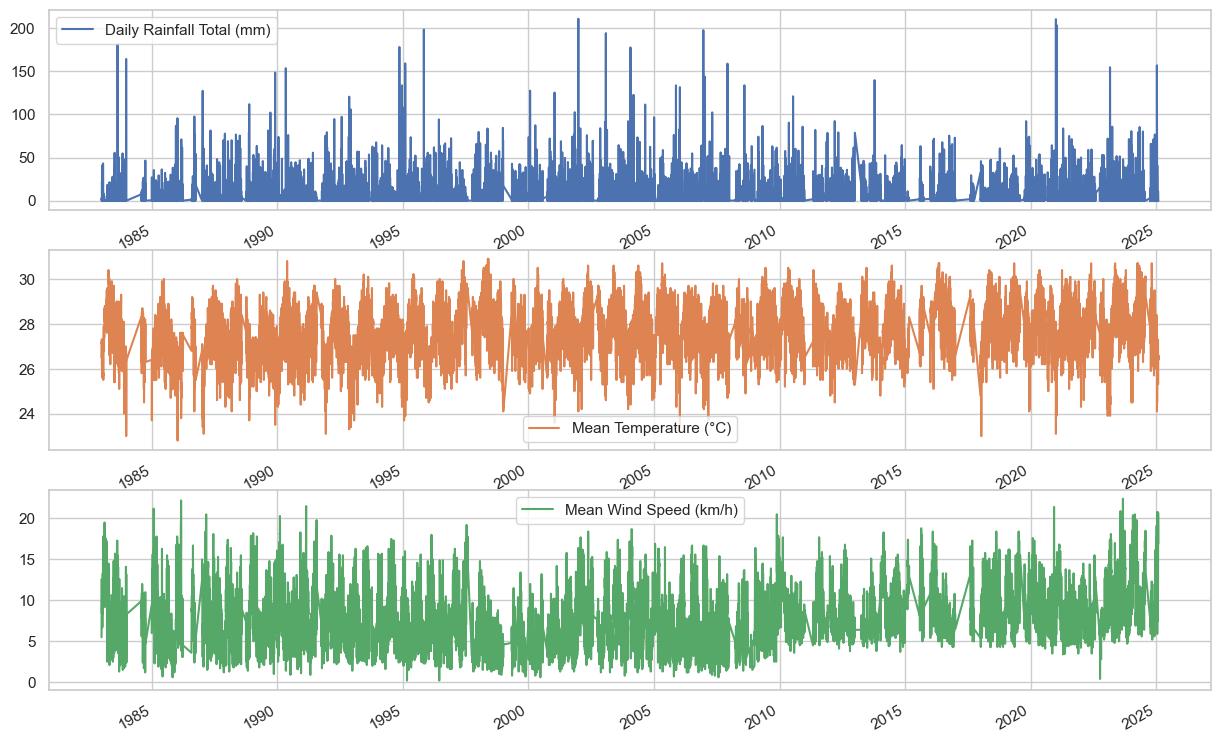

In [53]:
# Some plots of the raw data.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

clean_df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
clean_df[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
clean_df[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

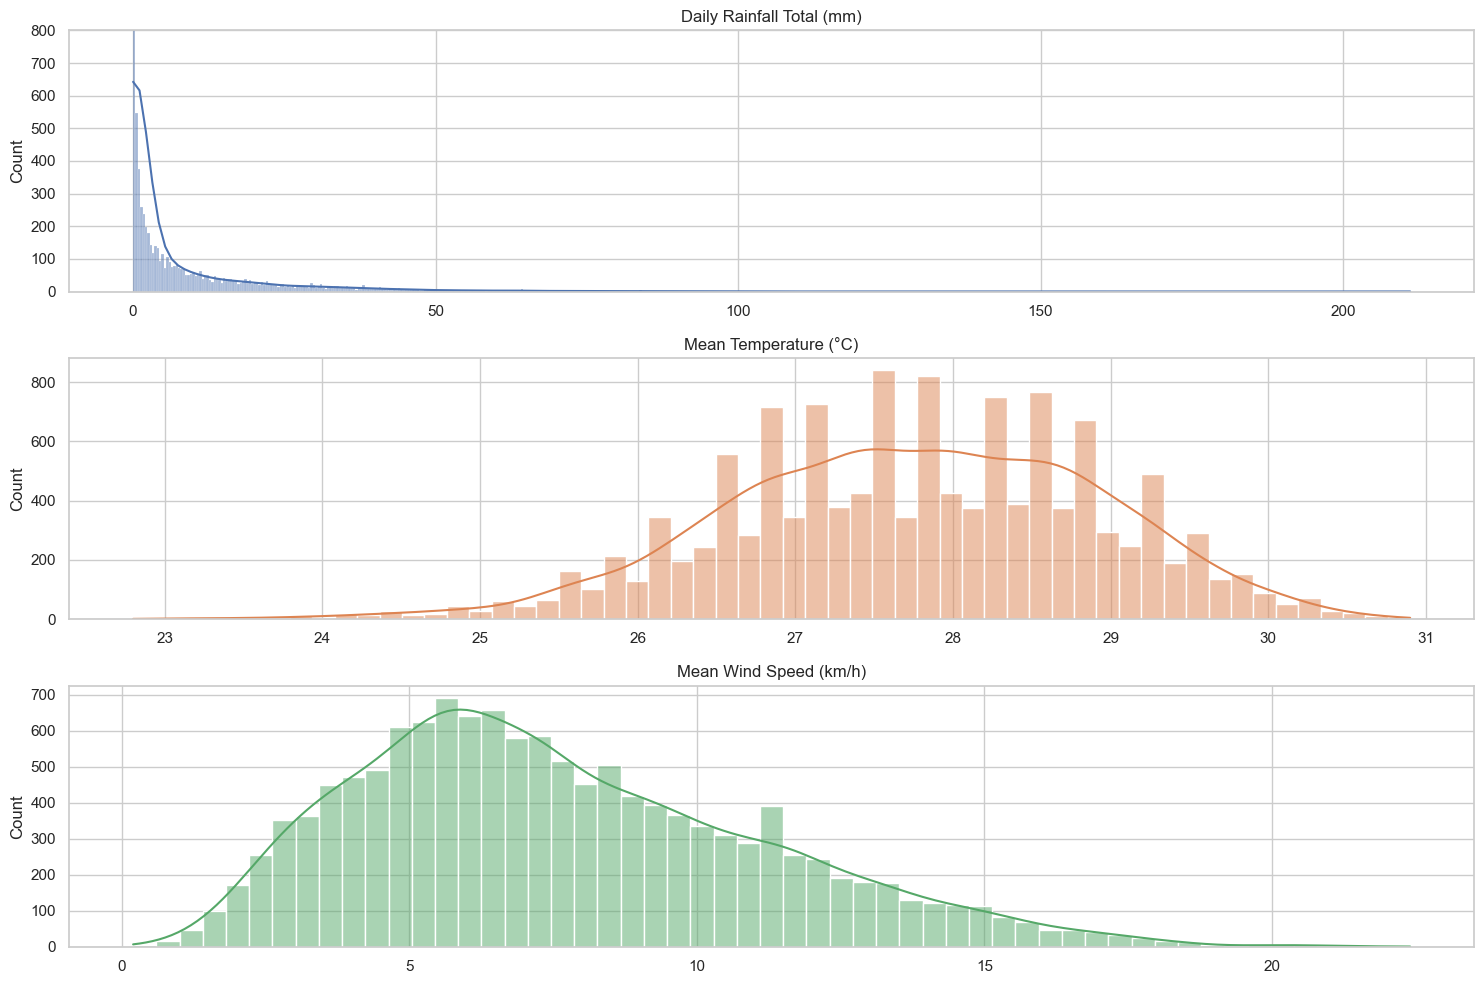

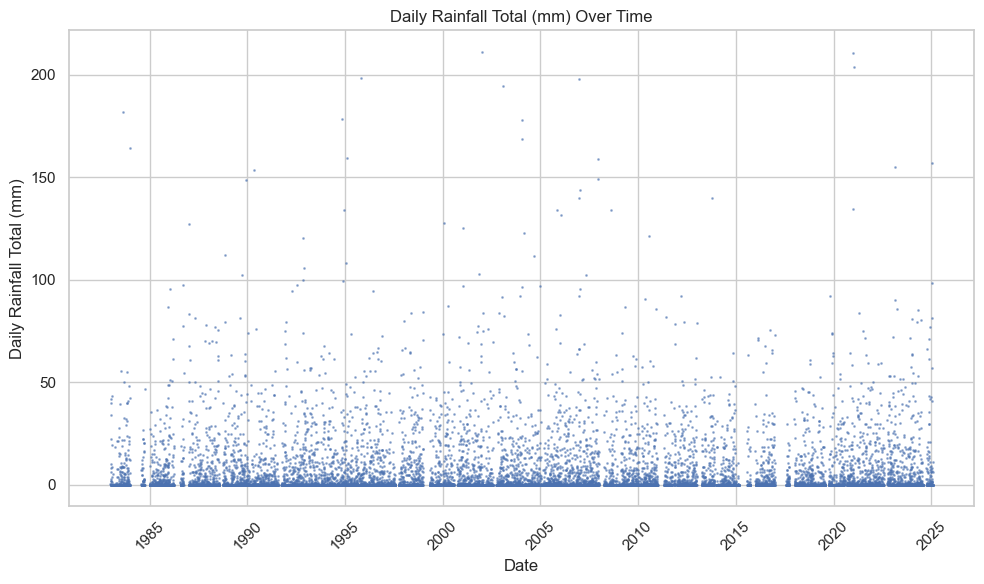

In [54]:
# histograms and kde of the raw data
import seaborn as sns
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
sns.histplot(clean_df['Daily Rainfall Total (mm)'].dropna().to_numpy(), kde=True, ax=ax[0], color='C0')
sns.histplot(clean_df['Mean Temperature (°C)'].dropna().to_numpy(), kde=True, ax=ax[1], color='C1')
sns.histplot(clean_df['Mean Wind Speed (km/h)'].dropna().to_numpy(), kde=True, ax=ax[2], color='C2')
ax[0].set_title('Daily Rainfall Total (mm)')
ax[1].set_title('Mean Temperature (°C)')
ax[2].set_title('Mean Wind Speed (km/h)')
ax[0].set_ylim(0, 800)
plt.tight_layout()
plt.show()

# scatter polt of the "Daily Rainfall Total (mm)" columns
plt.figure(figsize=(10, 6))
plt.scatter(clean_df.index, clean_df['Daily Rainfall Total (mm)'], s=1, alpha=0.5)
plt.title('Daily Rainfall Total (mm) Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Rainfall Total (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Smooth the Daily Rainfall Total, with moving sum windows


<Axes: >

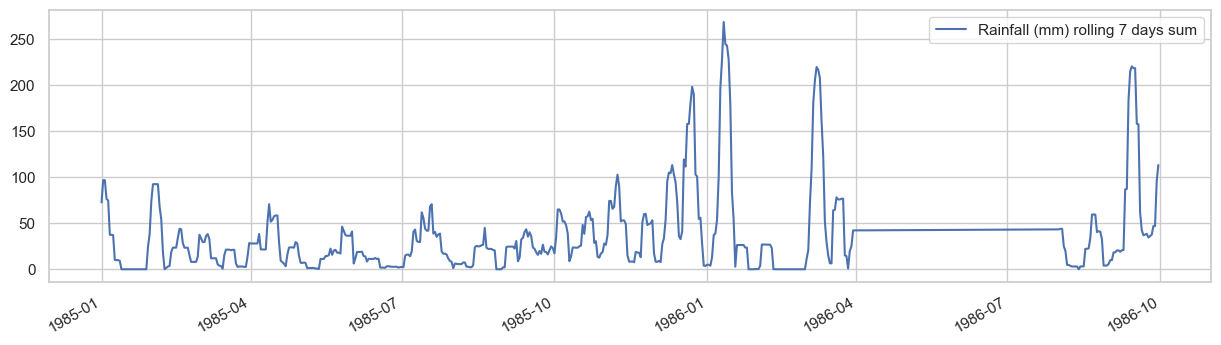

In [55]:
clean_df["Rainfall (mm) rolling 7 days sum"] = clean_df["Daily Rainfall Total (mm)"].rolling(window=7).sum().copy()

fig, ax = plt.subplots(1, 1, figsize=(15, 4))

clean_df.loc["1985":"1986"][['Rainfall (mm) rolling 7 days sum']].plot(ax=ax)

In [56]:
clean_df.isna().sum()

Station                             0
Year                                0
Month                               0
Day                                 0
Daily Rainfall Total (mm)           0
Mean Temperature (°C)               0
Maximum Temperature (°C)            0
Minimum Temperature (°C)            0
Mean Wind Speed (km/h)              0
Max Wind Speed (km/h)               0
Rainfall (mm) rolling 7 days sum    6
dtype: int64

In [57]:
clean_df.resample("D")

In [58]:
train_data = clean_df[(clean_df.index>='1985-01') &( clean_df.index<'1990-11')]["Rainfall (mm) rolling 7 days sum"]
test_data = clean_df[(clean_df.index>='1990-11') & (clean_df.index<'1991-01')]["Rainfall (mm) rolling 7 days sum"]

In [59]:
train_data.head()

1985-01-01    72.6
1985-01-02    96.7
1985-01-03    96.7
1985-01-04    76.3
1985-01-05    74.7
Name: Rainfall (mm) rolling 7 days sum, dtype: float64

In [60]:
test_data

1990-11-01    64.4
1990-11-02    66.1
1990-11-03    66.1
1990-11-04    94.0
1990-11-05    94.0
              ... 
1990-12-27     0.9
1990-12-28     0.0
1990-12-29     0.0
1990-12-30     0.0
1990-12-31     0.0
Name: Rainfall (mm) rolling 7 days sum, Length: 61, dtype: float64

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error


In [62]:
# Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error
# Set the frequency of the train_data index to daily ('D') for proper time series modeling
clean_df.dropna(inplace=True)




In [63]:
clean_df.isna().sum()

Station                             0
Year                                0
Month                               0
Day                                 0
Daily Rainfall Total (mm)           0
Mean Temperature (°C)               0
Maximum Temperature (°C)            0
Minimum Temperature (°C)            0
Mean Wind Speed (km/h)              0
Max Wind Speed (km/h)               0
Rainfall (mm) rolling 7 days sum    0
dtype: int64

In [73]:
start = "1995-01-01"
end = "1996-01-01"

X = clean_df[(clean_df.index >= start) & (clean_df.index < end)].copy()
X = X["Rainfall (mm) rolling 7 days sum"]

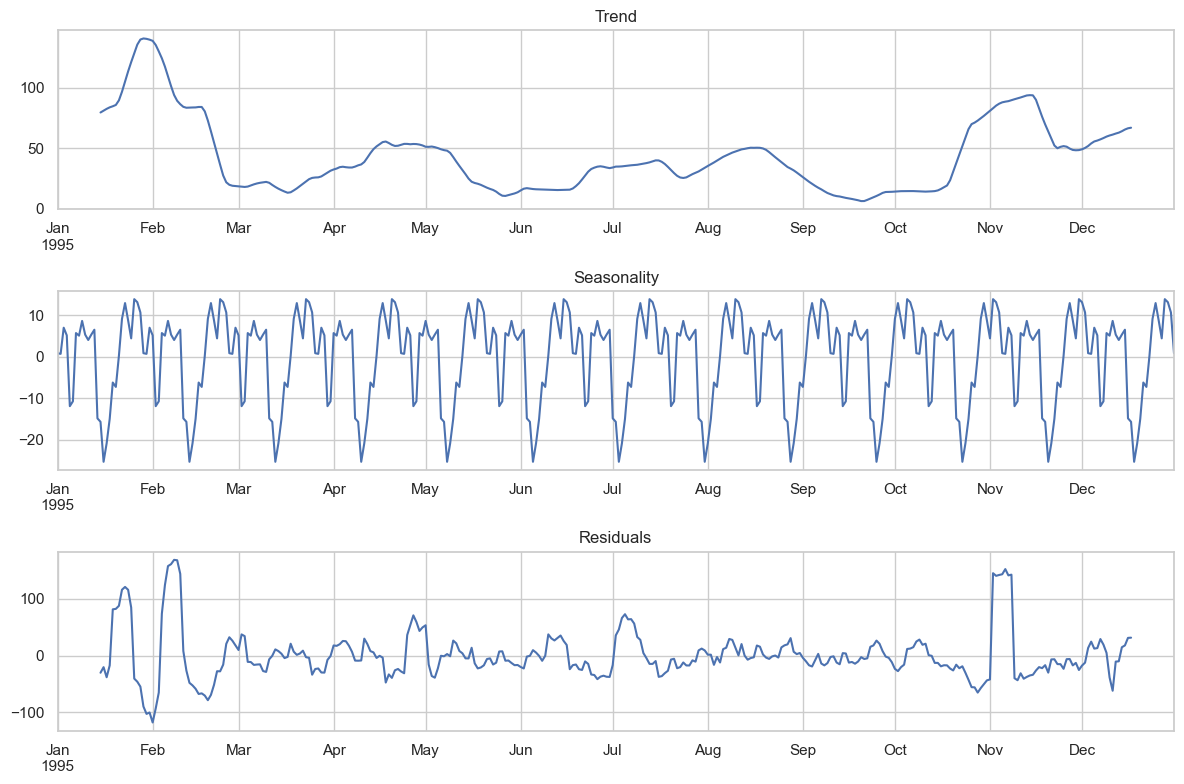

In [74]:
# Decompose the time series to check trend and seasonality
decomposition = seasonal_decompose(X, model='additive', period=28)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
decomposition.trend.plot(ax=ax1, title='Trend')
decomposition.seasonal.plot(ax=ax2, title='Seasonality')
decomposition.resid.plot(ax=ax3, title='Residuals')
plt.tight_layout()
plt.show()

In [66]:
# ADF Test for stationarity
def adf_test(series, name="Data"):
    result = adfuller(series.dropna())
    print(f"ADF Test for {name}:")
    print(f"  Test Statistic: {result[0]:.4f}")
    print(f"  P-value: {result[1]:.4f}")
    print(f"  Critical Values: {result[4]}")
    print("  Stationary" if result[1] < 0.05 else "  Not Stationary")

# Check stationarity of original data
adf_test(X, "Original Data")

# Apply differencing if needed
df_diff = X.diff().dropna()
adf_test(df_diff, "1st Differenced Data")  # Checking for d

# Seasonal differencing (D)
df_seasonal_diff = X.diff(28).dropna()
adf_test(df_seasonal_diff, "Seasonal Differenced Data (28)")  # Checking for D

# Seasonal + First Differencing
df_combined_diff = X.diff().diff(28).dropna()
adf_test(df_combined_diff, "1st + Seasonal Differenced Data (28)")

ADF Test for Original Data:
  Test Statistic: -3.5575
  P-value: 0.0066
  Critical Values: {'1%': -3.448645946352023, '5%': -2.869602139060357, '10%': -2.5710650077160495}
  Stationary
ADF Test for 1st Differenced Data:
  Test Statistic: -8.0056
  P-value: 0.0000
  Critical Values: {'1%': -3.4491725955218655, '5%': -2.8698334971428574, '10%': -2.5711883591836733}
  Stationary
ADF Test for Seasonal Differenced Data (28):
  Test Statistic: -4.3415
  P-value: 0.0004
  Critical Values: {'1%': -3.4502011472639724, '5%': -2.8702852297358983, '10%': -2.5714292194077513}
  Stationary
ADF Test for 1st + Seasonal Differenced Data (28):
  Test Statistic: -10.8137
  P-value: 0.0000
  Critical Values: {'1%': -3.4503836022181056, '5%': -2.8703653471616826, '10%': -2.571471939191249}
  Stationary


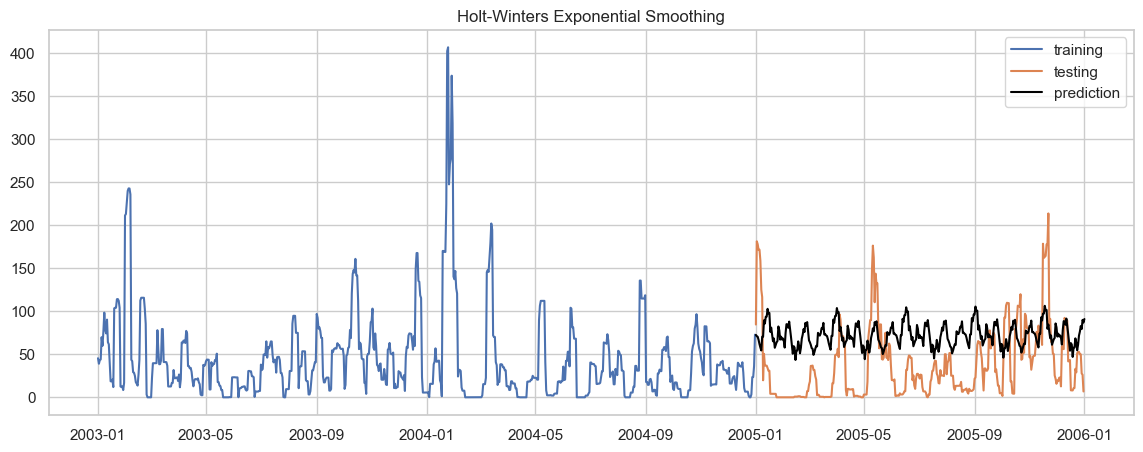

In [152]:
start = "2003-01-01"
end = "2005-01-01"

train_data = clean_df[(clean_df.index >= start) & (clean_df.index < end)]["Rainfall (mm) rolling 7 days sum"]
train_data = train_data.asfreq('D')

# Shift start and end by 1 year using pd.DateOffset
test_start = end
test_end = (pd.to_datetime(end) + pd.DateOffset(years=1)).strftime('%Y-%m-%d')
test_data = clean_df[(clean_df.index >= test_start) & (clean_df.index < test_end)]["Rainfall (mm) rolling 7 days sum"]
test_data = test_data.asfreq('D')

es_model = HWES(train_data, seasonal_periods=77, trend='add', seasonal='add',
    damped_trend=False, freq='D').fit()

# Use the actual index values from test_data for prediction
pred1 = es_model.predict(start=test_start, end=test_end)
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(pred1, label='prediction', color = "black")
plt.legend()
plt.title('Holt-Winters Exponential Smoothing')
plt.show()

In [144]:
test_data

2005-01-01     84.6
2005-01-02    181.3
2005-01-03    178.0
2005-01-04    171.3
2005-01-05    171.6
              ...  
2005-12-27     50.1
2005-12-28     49.9
2005-12-29     27.7
2005-12-30     26.2
2005-12-31      6.8
Freq: D, Name: Rainfall (mm) rolling 7 days sum, Length: 365, dtype: float64

In [101]:
pred1

1997-01-01    41.032188
Freq: D, dtype: float64

In [ ]:
# How about resampling, would that smoothen out the fluctuations?
# Or how about looking within a smaller time frame?

# Let us try smaller time frame first, this is easier.



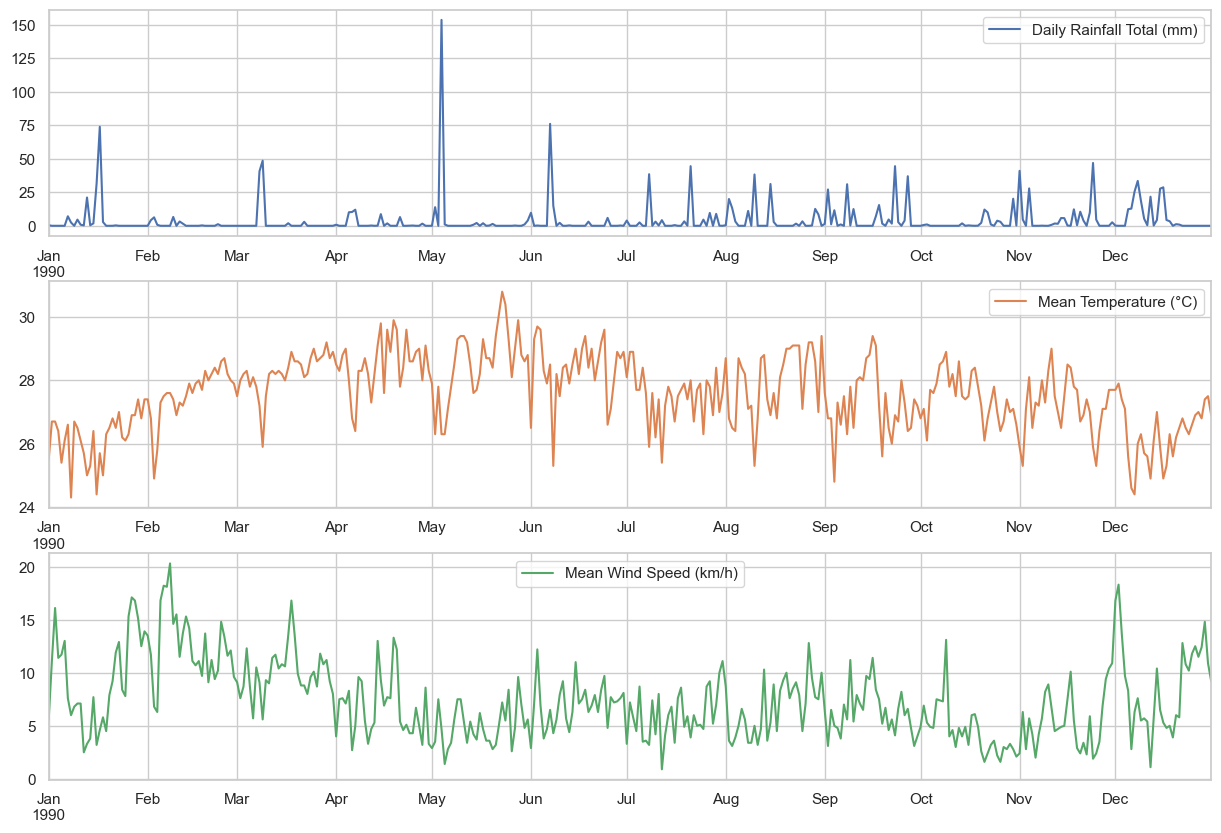

In [ ]:
# Just one year.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

clean_df[['Daily Rainfall Total (mm)']]['1990':'1990'].plot(ax=ax[0])
clean_df[['Mean Temperature (°C)']]['1990':'1990'].plot(ax=ax[1], c='C1')
clean_df[['Mean Wind Speed (km/h)']]['1990':'1990'].plot(ax=ax[2], c='C2')
plt.show()

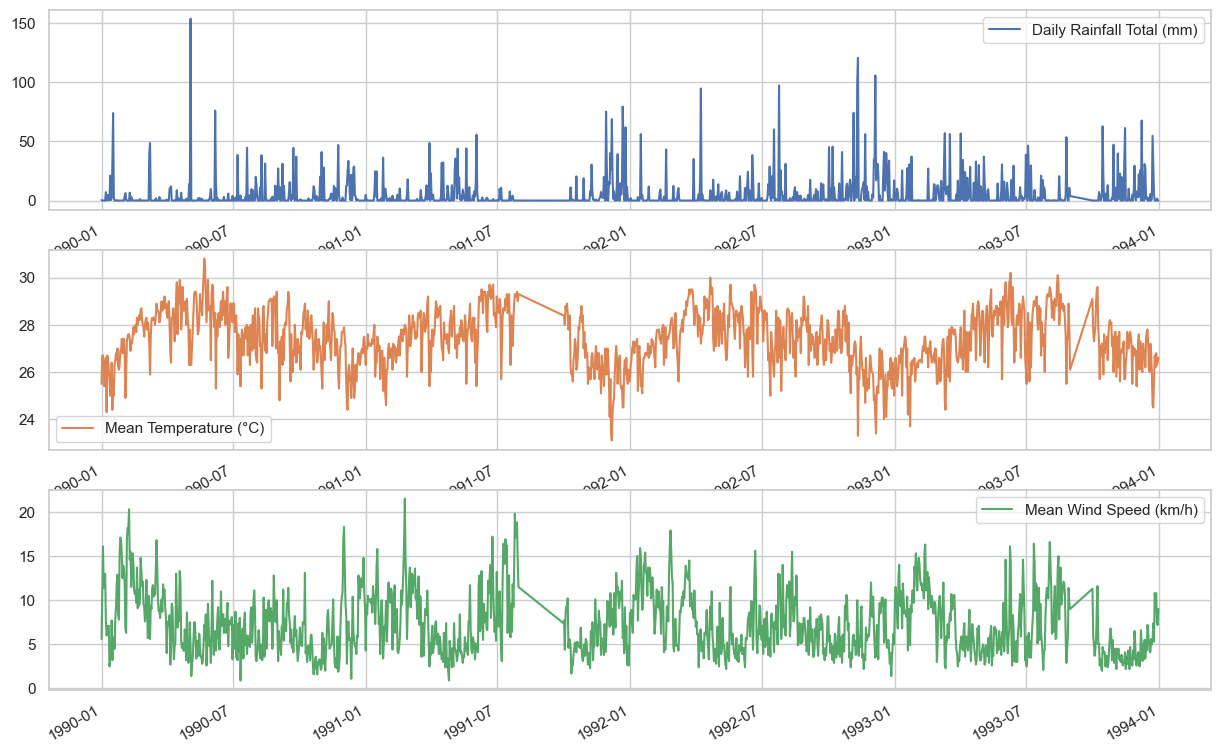

In [ ]:
# How about over four years?
# Maybe ENSO? La Nini, El Nino southern oscillation? How often do they recur?

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

clean_df[['Daily Rainfall Total (mm)']]['1990':'1993'].plot(ax=ax[0])
clean_df[['Mean Temperature (°C)']]['1990':'1993'].plot(ax=ax[1], c='C1')
clean_df[['Mean Wind Speed (km/h)']]['1990':'1993'].plot(ax=ax[2], c='C2')
plt.show()

In [ ]:
# So ... any insights?

# Fine, time for resampling.

In [ ]:
df_weekly = df.resample('W').mean(numeric_only=True)
df_monthly = df.resample('ME').mean(numeric_only=True)

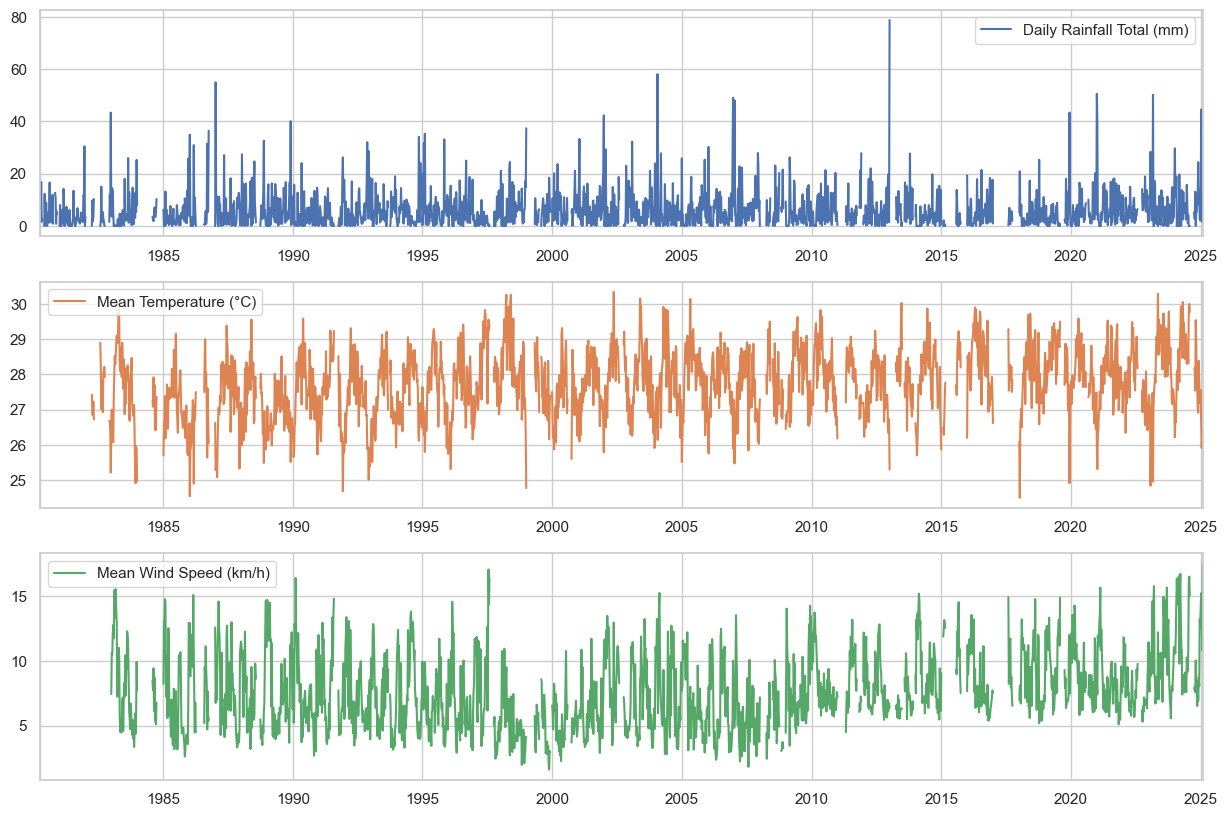

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df_weekly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_weekly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_weekly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

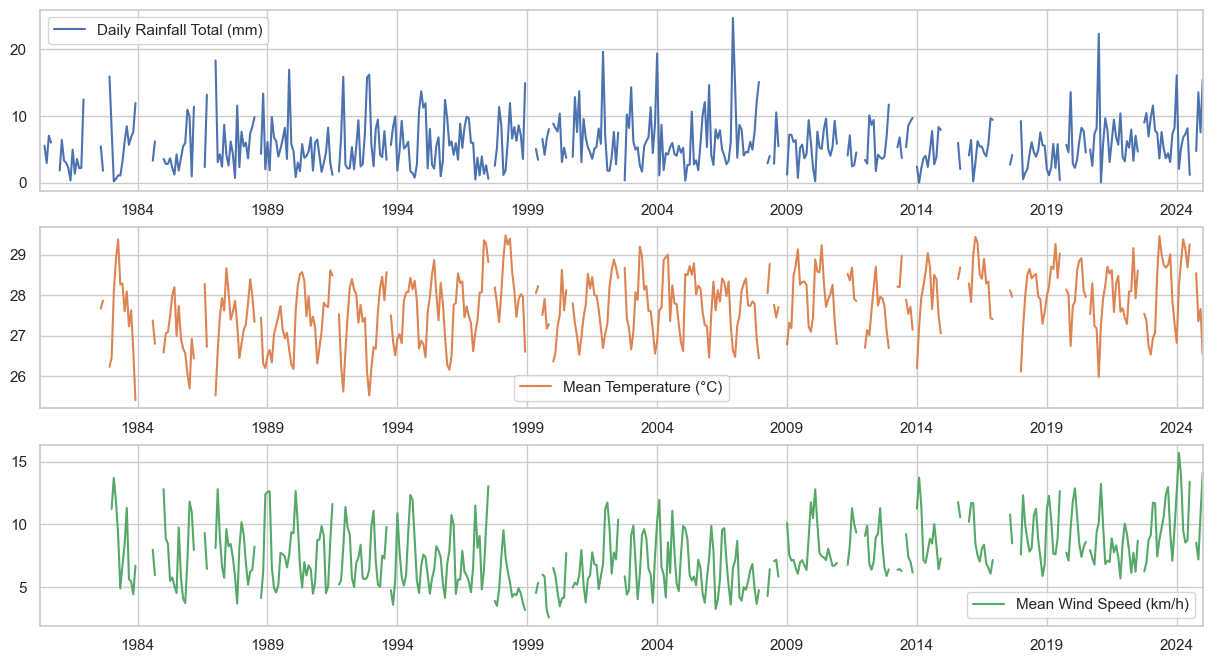

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 8))

df_monthly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_monthly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_monthly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

# Bonus ... taking diff of rainfall and plotting it ... visual check of stationarity.

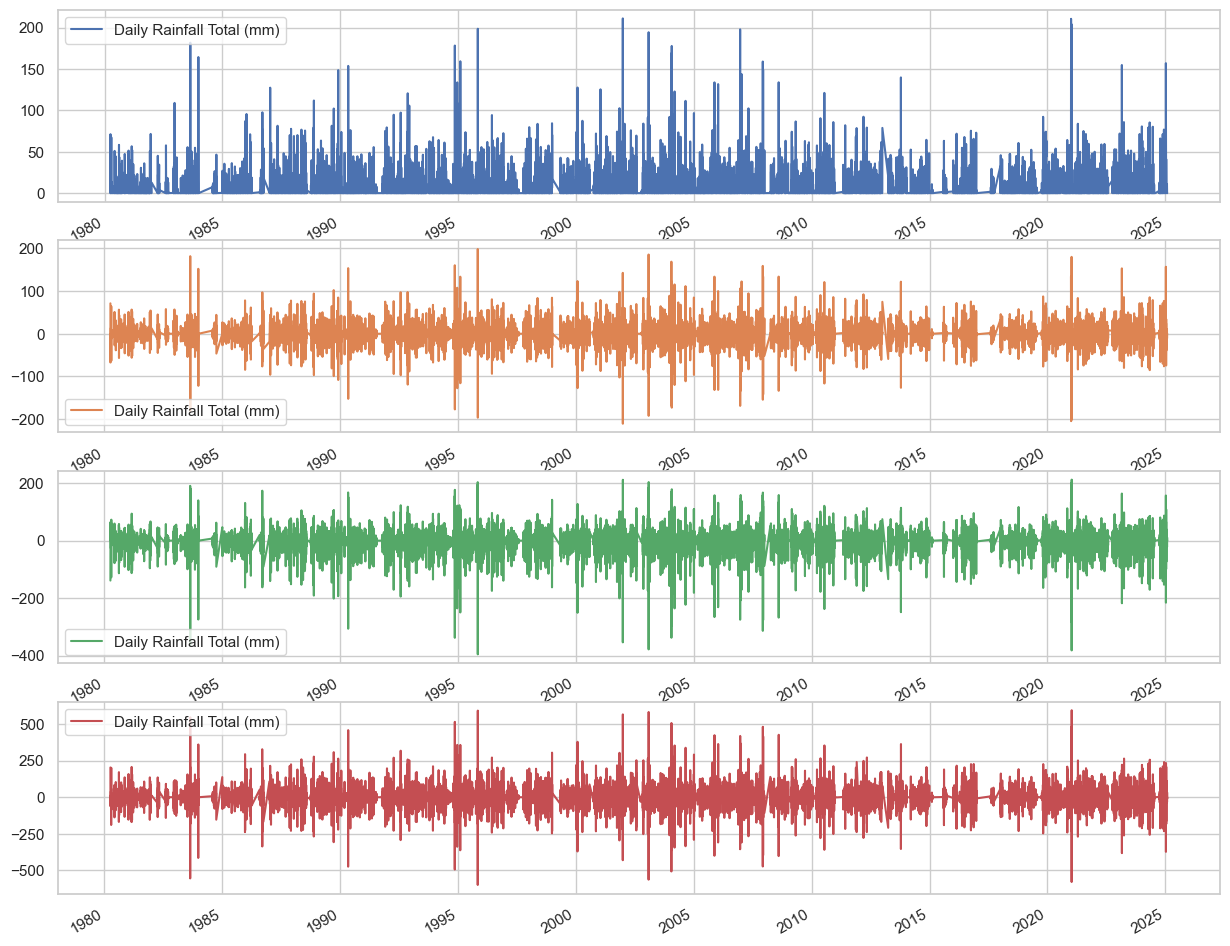

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(15, 13))
clean_df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
clean_df[['Daily Rainfall Total (mm)']].diff().plot(ax=ax[1], c='C1')
clean_df[['Daily Rainfall Total (mm)']].diff().diff().plot(ax=ax[2], c='C2')
clean_df[['Daily Rainfall Total (mm)']].diff().diff().diff().plot(ax=ax[3], c='C3')
plt.show()

# Of course, these are just plots. Do the relevant test!

# End of example starter code. Have fun!

In [ ]:
# df.set_index(pd.to_datetime(clean_df[['Year', 'Month', 'Day']]), inplace=True)

In [ ]:
X = clean_df[["Daily Rainfall Total (mm)", "Mean Temperature (°C)", "Mean Wind Speed (km/h)"]].copy()
X.dropna(inplace=True)

In [ ]:
X.describe()

,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
count,13015.000000,13015.000000,13015.000000
mean,5.929942,27.743980,7.616097
std,14.576708,1.179134,3.525880
min,0.000000,22.800000,0.200000
25%,0.000000,26.900000,5.000000
50%,0.000000,27.800000,7.000000
75%,4.600000,28.600000,9.800000
max,211.100000,30.900000,22.400000


In [ ]:
df.isna().sum()

Station                        0
Year                           0
Month                          0
Day                            0
Daily Rainfall Total (mm)      0
Mean Temperature (°C)        547
Maximum Temperature (°C)     547
Minimum Temperature (°C)     547
Mean Wind Speed (km/h)       679
Max Wind Speed (km/h)        685
dtype: int64